In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.linear_model import Ridge, LogisticRegression
import matplotlib.pyplot as plt

# DATA PREP

In [2]:
data = pd.read_csv('../data/cleaned_data_v2.csv')
drop_cols = ['Unnamed: 0', 'dateload', 'IPC', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']
data = data.drop(columns=drop_cols)

# COUNTRY PREDICTION

In [3]:
# Encode categorical variable (Country)
data['country'] = LabelEncoder().fit_transform(data['country'])

# Sample 50% of the data
df = data.sample(frac=0.5, random_state=42).dropna()

# Define Features and Targets
X = df.drop(columns=['country'])
y_country = df['country']

# Train-test split for country prediction
X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(
    X, y_country, test_size=0.2, random_state=42
)

In [4]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_country, y_train_country)  # Training on all features initially

# Extract feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X_train_country.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df["Feature"].head(10).tolist()
print("Top 10 Features for Country Prediction:", top_10_features)

# Use these top 10 features for classification
X_train_country_reduced = X_train_country[top_10_features]
X_test_country_reduced = X_test_country[top_10_features]


Top 10 Features for Country Prediction: ['EST4_E', 'CSN5_E', 'EXT1_E', 'CSN8_E', 'AGR1_E', 'CSN10_E', 'AGR8_E', 'CSN6_E', 'EST10_E', 'CSN1_E']


In [25]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     "C": [0.01, 0.1, 1, 10],
#     "max_iter": [500, 1000]
# }

# grid_search = GridSearchCV(
#     LogisticRegression(random_state=42),
#     param_grid,
#     cv=5,
#     scoring="accuracy"
# )
# grid_search.fit(X_train_country, y_train_country)
# print("Best Params:", grid_search.best_params_)


/opt/homebrew/Caskroom/miniforge/base/envs/capstone/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/capstone/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/capstone/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMI

KeyboardInterrupt: 

In [5]:
# Models to Compare in Predicting Country
models_classification = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced"),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42)
}
for name, model in models_classification.items():
    model.fit(X_train_country_reduced, y_train_country)
    y_pred = model.predict(X_test_country_reduced)
    acc = accuracy_score(y_test_country, y_pred)
    print(f"{name} - Country Prediction Accuracy: {acc:.4f}")
    print(classification_report(y_test_country, y_pred))

# TRAIT SCORE PREDICTION

In [6]:
X = df.drop(columns=['O score', 'C score', 'E score', 'A score', 'N score'])
y_scores = df[['O score', 'C score', 'E score', 'A score', 'N score']]

# Train-test split for trait score prediction (separately)
X_train_scores, X_test_scores, y_train_scores, y_test_scores = train_test_split(
    X, y_scores, test_size=0.2, random_state=42
)

# Ensure these columns exist in your dataset
selected_features = ["country","introelapse","testelapse","endelapse"]  

X_train_scores= X_train_scores[selected_features]
X_test_scores= X_test_scores[selected_features]

In [20]:
# import pandas as pd

# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train_scores, y_train_scores)

# # Get feature importance
# feature_importance = pd.DataFrame(
#     {"Feature": X_train_scores.columns, "Importance": rf_model.feature_importances_}
# ).sort_values(by="Importance", ascending=False)

# print(feature_importance.head(10))  # Top 10 important features


   Feature  Importance
4     EXT5    0.145360
17    EST8    0.116269
23    AGR4    0.071666
35    CSN6    0.062232
3     EXT4    0.056175
10    EST1    0.036851
49   OPN10    0.034080
41    OPN2    0.018904
15    EST6    0.018834
26    AGR7    0.018386


In [22]:
feature_importance.head(50)

,Feature,Importance
4,EXT5,0.145360
17,EST8,0.116269
23,AGR4,0.071666
35,CSN6,0.062232
3,EXT4,0.056175
10,EST1,0.036851
49,OPN10,0.034080
41,OPN2,0.018904
15,EST6,0.018834
26,AGR7,0.018386


In [7]:
models_regression = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0)  # Ridge is chosen to prevent overfitting
}
results = {}
for trait in y_scores.columns:
    results[trait] = {}
    
    for name, model in models_regression.items():
        model.fit(X_train_scores, y_train_scores[trait])
        y_pred = model.predict(X_test_scores)
        
        mae = mean_absolute_error(y_test_scores[trait], y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_scores[trait], y_pred))
        r2 = r2_score(y_test_scores[trait], y_pred)
        
        results[trait][name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
        print(f"\n{trait} - {name} Performance:")
        print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


O score - Random Forest Performance:
  MAE: 3.1836, RMSE: 4.1289, R²: 0.0266

O score - Ridge Regression Performance:
  MAE: 3.0497, RMSE: 4.1847, R²: 0.0001

C score - Random Forest Performance:
  MAE: 3.2783, RMSE: 4.2673, R²: -0.0204

C score - Ridge Regression Performance:
  MAE: 3.0800, RMSE: 4.2213, R²: 0.0015

E score - Random Forest Performance:
  MAE: 2.8944, RMSE: 3.8222, R²: -0.0092

E score - Ridge Regression Performance:
  MAE: 2.6945, RMSE: 3.8043, R²: 0.0003

A score - Random Forest Performance:
  MAE: 2.9938, RMSE: 3.9416, R²: 0.0087

A score - Ridge Regression Performance:
  MAE: 2.8392, RMSE: 3.9583, R²: 0.0003

N score - Random Forest Performance:
  MAE: 5.6652, RMSE: 7.0165, R²: -0.1091

N score - Ridge Regression Performance:
  MAE: 5.3630, RMSE: 6.6579, R²: 0.0014


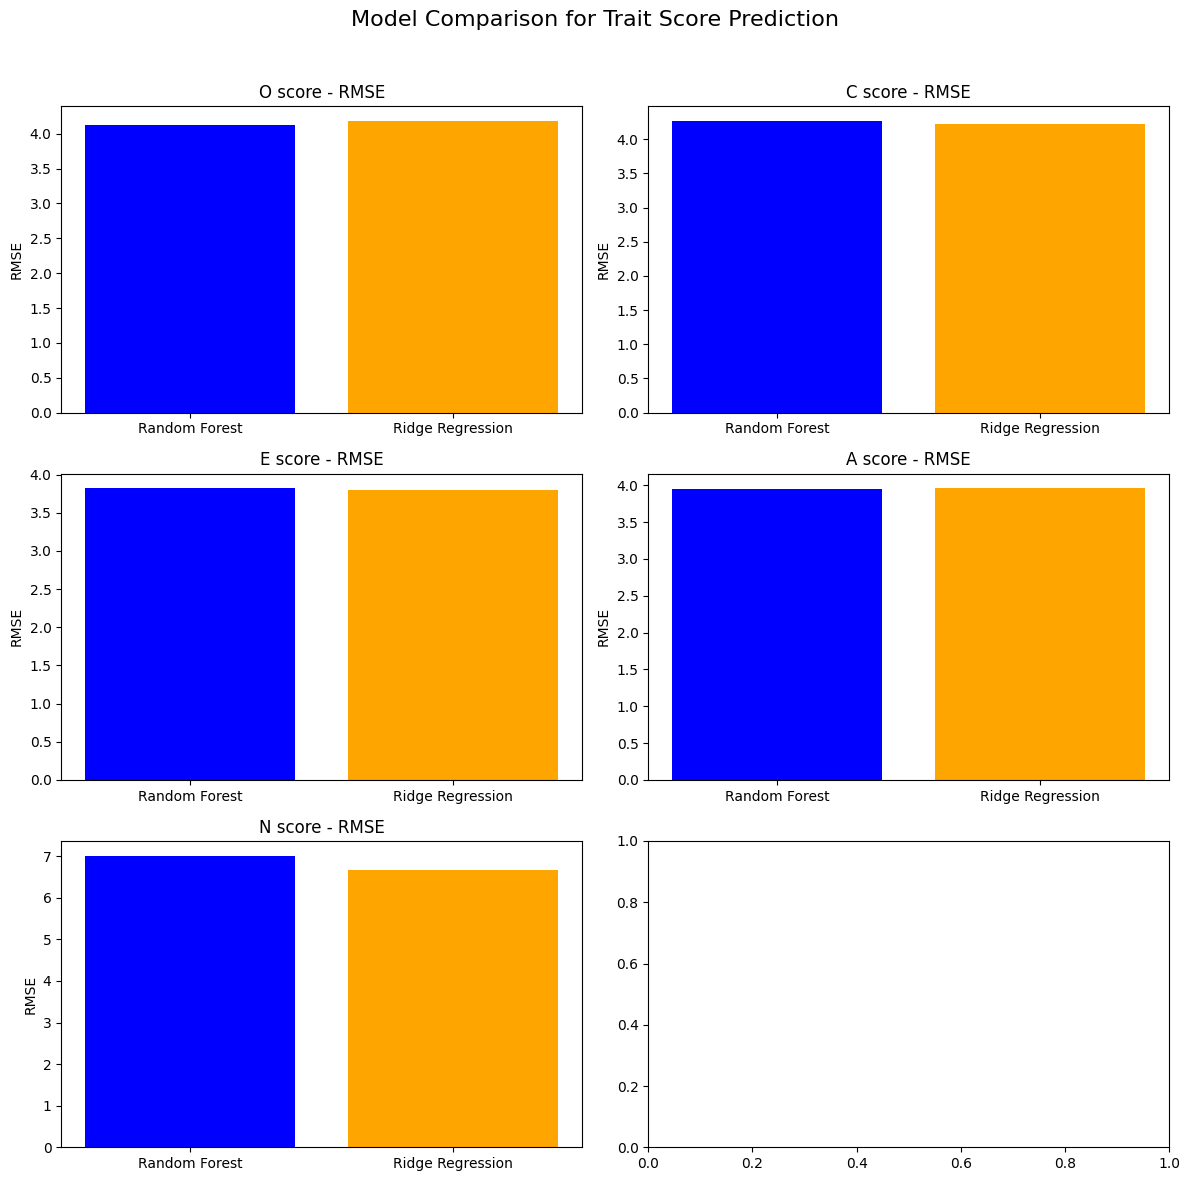

In [8]:
# Plot Model Performance
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Model Comparison for Trait Score Prediction", fontsize=16)

metrics = ["MAE", "RMSE", "R2"]
colors = ["blue", "orange"]

for idx, trait in enumerate(y_scores.columns):
    ax = axes[idx//2, idx%2]
    values = [results[trait][model][metrics[1]] for model in models_regression]  # Plot RMSE
    
    ax.bar(models_regression.keys(), values, color=colors)
    ax.set_title(f"{trait} - RMSE")
    ax.set_ylabel("RMSE")
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [9]:
values = [results[trait][model][metrics[1]] for model in models_regression]  # Plot RMSE
results

{'O score': {'Random Forest': {'MAE': 3.1835683508193293,
   'RMSE': np.float64(4.1288654525912465),
   'R2': 0.026559414269016535},
  'Ridge Regression': {'MAE': 3.049712479147255,
   'RMSE': np.float64(4.184690597874037),
   'R2': 5.8266786176486285e-05}},
 'C score': {'Random Forest': {'MAE': 3.2782651636277973,
   'RMSE': np.float64(4.2672567696812465),
   'R2': -0.020364596657585388},
  'Ridge Regression': {'MAE': 3.0799859881930742,
   'RMSE': np.float64(4.221337856949233),
   'R2': 0.0014770421072058948}},
 'E score': {'Random Forest': {'MAE': 2.8943554461511685,
   'RMSE': np.float64(3.8221986858596617),
   'R2': -0.009158091241712407},
  'Ridge Regression': {'MAE': 2.6944813420754556,
   'RMSE': np.float64(3.8042764080673197),
   'R2': 0.00028359903477503945}},
 'A score': {'Random Forest': {'MAE': 2.9937795807892114,
   'RMSE': np.float64(3.941637121610507),
   'R2': 0.008650787490412482},
  'Ridge Regression': {'MAE': 2.8391869945379007,
   'RMSE': np.float64(3.9582800576649

# PERCENTILE PREDICTION